# COVID-19 Auswertung - Impfungen


## import libraries

In [67]:
Programm_Name = "Impfungen" # 04.01.2021 - Time Series Impffdaten erstellen

### Speicherorte und Dateinamen Plots

In [68]:
Laufwerk = "D:\\"
pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"

name_input = "Impfquotenmonitoring.xlsx"
name_input2 = "02-bundeslaender.xlsx"

name_7 = "plot_7_Impfquote_ger.png" # Impfquote Deutschland Bundesländer
name_7_2 = "plot_7-2_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_3 = "plot_7-3_Impfungen_Timeseries_ger.png" # Impfungen Timeseries Deutschland
name_7_4 = "plot_7-4_Impfungen_kumuliert_Timeseries_ger.png" # Impfungen Timeseries Deutschland

name_output_df_EW = 'Dataframes\\df_EW.csv'
name_output_df_I = 'Dataframes\\df_I.csv'
name_output_df_I_EW = 'Dataframes\\df_I_EW.csv'
name_output_df_I_TS = 'Dataframes\\df_I_TS.csv'

name_performance = 'Dataframes\\df_performance.csv'

### Speicherorte und Dateinamen Plots

In [69]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import matplotlib.dates as mdates
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import numpy as np

# performance
from datetime import datetime, timedelta
from datetime import date # todays date
#import seaborn as sns

import os
now = datetime.now()

In [70]:
# Datum einstellen 
minticks = 14
maxticks = 14

# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [71]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1.3
v = 9
dpi = 200

 ### Bezugsgröße Einwohner

In [72]:
pE = 100_000

## Länder Farben

In [73]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange


### Einwohnerzahlen

In [74]:
E_fr = 66_012_908
E_pl = 38_659_927
E_ger = 83_020_000
E_cz = 10_586_651
E_at = 8_902_600
E_ch = 8_847_020
E_gb = 66_650_000

E_isr = 8_884_000
E_usa = 328_200_000
E_rus = 144_500_000
E_ita = 60_360_000
E_spa = 46_940_000
E_se = 10_230_000


# Preprocessing Dataframes

In [75]:
today = date.today().strftime("%d.%m.%Y")

## Datenimport

In [76]:
# Datenimport Einwohnerdaten Bundesländer
df_EW = pd.read_excel(Laufwerk + pfad_input + name_input2,
                     sheet_name="Bundesländer_mit_Hauptstädten",
                     usecols="A:G",
                     skiprows=6)


# Impfungen sheet_name der Datenquelle auslesen
df_I_sheet = pd.read_excel(Laufwerk + pfad_input + name_input, None)
sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
sheet_name = [*sheet_name][1]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen


# Datenimport Impfungen
df_I = pd.read_excel(Laufwerk + pfad_input + name_input,
                    sheet_name = sheet_name,
                    usecols="A:M")




## preprocessing

In [77]:
print(datetime. today())
ts_x = str(datetime. today() - timedelta(140))
ts = pd.to_datetime(ts_x, utc=True)
print(ts)

2021-04-01 23:37:01.610236
2020-11-12 23:37:01.610236+00:00


### df_I (Impfdaten pro Bundesland)

In [78]:
df_I

,RS,Bundesland,Gesamtzahl bisher verabreichter Impfstoffdosen,Erstimpfung,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Zweitimpfung,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,Impfungen kumulativ,NaN,NaN,NaN,Differenz zum Vortag,"Impf-quote, %",Impfungen kumulativ,NaN,NaN,NaN
1,NaN,NaN,NaN,Gesamt,BioNTech,Moderna,AstraZeneca,NaN,NaN,Gesamt,BioNTech,Moderna,AstraZeneca
2,08,Baden-Württemberg,1815093.0,1271038,809497,57403,404138,26601,11.4504,544055,513975,29957,123
3,09,Bayern,2270836.0,1554388,1043525,83266,427597,26339,11.8432,716448,690296,26072,80
4,11,Berlin,646217.0,438215,282340,42712,113163,4759,11.9421,208002,200381,7621,0
5,12,Brandenburg,433217.0,331783,210346,21668,99769,12053,13.1561,101434,97311,4119,4
6,04,Bremen,127832.0,91975,59391,5963,26621,2572,13.5019,35857,33836,2018,3
7,02,Hamburg,304596.0,213839,146298,7887,59654,4419,11.5761,90757,89102,1612,43
8,06,Hessen,1043671.0,712590,475997,26629,209964,9456,11.3324,331081,320345,10655,81
9,13,Mecklenburg-Vorpommern,246333.0,170744,124696,10790,35258,5326,10.6175,75589,70907,4604,78


In [79]:
# rename columns
df_I.rename(columns= {"RS": "RS"},inplace=True)
df_I.rename(columns= {"Bundesland": "Bundesland"},inplace=True)
df_I.rename(columns= {"Gesamtzahl bisher verabreichter Impfstoffdosen": "Summe_Impfungen"},inplace=True)
df_I.rename(columns= {"Erstimpfung": "Summe_EI"},inplace=True)
df_I.rename(columns= {"Unnamed: 4": "BioNTech_EI"},inplace=True)
df_I.rename(columns= {"Unnamed: 5": "Moderna_EI"},inplace=True)
df_I.rename(columns= {"Unnamed: 6": "AstraZeneca_EI"},inplace=True)
df_I.rename(columns= {"Unnamed: 7": "Differenz_zum_Vortag_EI"},inplace=True)
df_I.rename(columns= {"Unnamed: 8": "Impfquote"},inplace=True)
df_I.rename(columns= {"Zweitimpfung": "Summe_ZI"},inplace=True)
df_I.rename(columns= {"Unnamed: 10": "BioNTech_ZI"},inplace=True)
df_I.rename(columns= {"Unnamed: 11": "Moderna_ZI"},inplace=True)
df_I.rename(columns= {"Unnamed: 12": "AstraZeneca_ZI"},inplace=True)

df_I = df_I.iloc[2:]   # drop row 0 and 1
df_I = df_I.iloc[:16]
# df_I = df_I[:-3]   # drop last rows

df_I = df_I.drop(columns=['RS','Differenz_zum_Vortag_EI','Impfquote'])
df_I = df_I[df_I.Bundesland != "Gesamt"]
df_I

,Bundesland,Summe_Impfungen,Summe_EI,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_ZI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI
2,Baden-Württemberg,1815093.0,1271038,809497,57403,404138,544055,513975,29957,123
3,Bayern,2270836.0,1554388,1043525,83266,427597,716448,690296,26072,80
4,Berlin,646217.0,438215,282340,42712,113163,208002,200381,7621,0
5,Brandenburg,433217.0,331783,210346,21668,99769,101434,97311,4119,4
6,Bremen,127832.0,91975,59391,5963,26621,35857,33836,2018,3
7,Hamburg,304596.0,213839,146298,7887,59654,90757,89102,1612,43
8,Hessen,1043671.0,712590,475997,26629,209964,331081,320345,10655,81
9,Mecklenburg-Vorpommern,246333.0,170744,124696,10790,35258,75589,70907,4604,78
10,Niedersachsen,1332433.0,924260,588498,47831,287931,408173,395689,12051,433
11,Nordrhein-Westfalen,2764907.0,1938789,1213040,76331,649418,826118,804311,20863,944


In [80]:
df_I["Bundesland"] = df_I["Bundesland"].replace({'\*': ''}, regex=True)
df_I

,Bundesland,Summe_Impfungen,Summe_EI,BioNTech_EI,Moderna_EI,AstraZeneca_EI,Summe_ZI,BioNTech_ZI,Moderna_ZI,AstraZeneca_ZI
2,Baden-Württemberg,1815093.0,1271038,809497,57403,404138,544055,513975,29957,123
3,Bayern,2270836.0,1554388,1043525,83266,427597,716448,690296,26072,80
4,Berlin,646217.0,438215,282340,42712,113163,208002,200381,7621,0
5,Brandenburg,433217.0,331783,210346,21668,99769,101434,97311,4119,4
6,Bremen,127832.0,91975,59391,5963,26621,35857,33836,2018,3
7,Hamburg,304596.0,213839,146298,7887,59654,90757,89102,1612,43
8,Hessen,1043671.0,712590,475997,26629,209964,331081,320345,10655,81
9,Mecklenburg-Vorpommern,246333.0,170744,124696,10790,35258,75589,70907,4604,78
10,Niedersachsen,1332433.0,924260,588498,47831,287931,408173,395689,12051,433
11,Nordrhein-Westfalen,2764907.0,1938789,1213040,76331,649418,826118,804311,20863,944


### df_EW (Einwohnerdaten pro Bundesland)

In [81]:
# Spalten Überschriften definieren 
df_EW.rename(columns= {"Unnamed: 0": "Bundesland"},inplace=True)
df_EW.rename(columns= {"Unnamed: 1": "Stadt"},inplace=True)
df_EW.rename(columns= {"Unnamed: 2": "Fläche"},inplace=True)
df_EW.rename(columns= {"Unnamed: 3": "Einwohner"},inplace=True)
df_EW.rename(columns= {"Unnamed: 4": "Einwohner_M"},inplace=True)
df_EW.rename(columns= {"Unnamed: 5": "Einwohner_F"},inplace=True)
df_EW.rename(columns= {"Unnamed: 6": "Einwohner_pro_km²"},inplace=True)

# nicht gebrauchte columns löschen
df_EW = df_EW.drop(columns=['Stadt','Einwohner_M','Einwohner_F','Einwohner_pro_km²'])

# Rechnen
df_EW["Einwohner_pro_km²"] = df_EW["Einwohner"]/df_EW["Fläche"]

# alles löschen was keine Bundesländer sind
df_EW["Bundesland"] = df_EW["Bundesland"].fillna("x")      # ersetze alle NaN Werte mit x
df_EW["Fläche"] = df_EW["Fläche"].fillna("x")              # ersetze alle NaN Werte mit x
indexNames = df_EW[ df_EW['Bundesland'] == "x" ].index     # alle Index Werte mit "x" in eine Variable schreiben
df_EW.drop(indexNames , inplace=True)                      # lösche diese Index rows vom dataframe
indexNames = df_EW[ df_EW['Fläche'] == "x" ].index         # wiederholen
df_EW.drop(indexNames , inplace=True)                      # wiederholen


# Bundesland erste 3 Zeichen entfernen
df_EW["Bundesland"] = df_EW["Bundesland"].str[3:]

# Datentyp in float ändern
df_EW["Fläche"] = pd.to_numeric(df_EW["Fläche"], errors='coerce')

#remove space at start
df_EW["Bundesland"] = df_EW["Bundesland"].str.lstrip()

df_EW = df_EW.drop(columns=['Fläche', 'Einwohner_pro_km²'])

df_EW

,Bundesland,Einwohner
0,Schleswig-Holstein,2903773.0
2,Hamburg,1847253.0
4,Niedersachsen,7993608.0
6,Bremen,681202.0
8,Nordrhein-Westfalen,17947221.0
10,Hessen,6288080.0
12,Rheinland-Pfalz,4093903.0
14,Baden-Württemberg,11100394.0
16,Bayern,13124737.0
18,Saarland,986887.0


In [82]:
# Impfquote in % pro Bundesland
# VLOOKUP 
df_I_EW = pd.merge(df_I, df_EW, on='Bundesland', how='outer')   # how='outer','inner','left','right'
df_I_EW["Impfquote_EI"] = (df_I_EW["Summe_EI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_BioNTech_EI"] = (df_I_EW["BioNTech_EI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_Moderna_EI"] = (df_I_EW["Moderna_EI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_AstraZeneca_EI"] = (df_I_EW["AstraZeneca_EI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_BioNTech_ZI"] = (df_I_EW["BioNTech_ZI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_Moderna_ZI"] = (df_I_EW["Moderna_ZI"]/df_I_EW["Einwohner"])*100
df_I_EW["Impfquote_AstraZeneca_ZI"] = (df_I_EW["AstraZeneca_ZI"]/df_I_EW["Einwohner"])*100

df_I_EW["Impfquote_ZI"] = (df_I_EW["Summe_ZI"]/df_I_EW["Einwohner"])*100

df_I_EW["Summe_EI_ZI"] = (df_I_EW["Summe_EI"] + df_I_EW["Summe_ZI"])

df_I_EW["Impfquote_EI_ZI"] = (df_I_EW["Summe_EI"] + df_I_EW["Summe_ZI"]) * (1/df_I_EW["Einwohner"]) *100


# df_I_EW.drop(columns= ['Fläche', 'Einwohner', 'Einwohner_pro_km²'])
df_I_EW = df_I_EW.sort_values(by=['Impfquote_ZI'], ascending=False)

### Reihenfolge der Columns
# cols = list(df_I_EW.columns.values)
# print(cols)
df_I_EW = df_I_EW[['Bundesland', 
              'Einwohner', 
              'BioNTech_EI', 'Impfquote_BioNTech_EI', 
              'Moderna_EI','Impfquote_Moderna_EI',
              'AstraZeneca_EI', 'Impfquote_AstraZeneca_EI',
              'BioNTech_ZI', 'Impfquote_BioNTech_ZI',
              'Moderna_ZI', 'Impfquote_Moderna_ZI',
              'AstraZeneca_ZI', 'Impfquote_AstraZeneca_ZI',     
              'Summe_EI', 'Impfquote_EI',
              'Summe_ZI', 'Impfquote_ZI', 
              'Summe_EI_ZI', 'Impfquote_EI_ZI']]
df_I_EW.head(3)

,Bundesland,Einwohner,BioNTech_EI,Impfquote_BioNTech_EI,Moderna_EI,Impfquote_Moderna_EI,AstraZeneca_EI,Impfquote_AstraZeneca_EI,BioNTech_ZI,Impfquote_BioNTech_ZI,Moderna_ZI,Impfquote_Moderna_ZI,AstraZeneca_ZI,Impfquote_AstraZeneca_ZI,Summe_EI,Impfquote_EI,Summe_ZI,Impfquote_ZI,Summe_EI_ZI,Impfquote_EI_ZI
12,Sachsen,4071971.0,296575,7.28333,24606,0.604277,88108,2.16377,236130,5.79891,12396,0.304423,0,0,409289,10.0514,248526,6.10333,657815,16.1547
15,Thüringen,2133378.0,176794,8.28705,20001,0.937527,84697,3.97009,113746,5.33173,8859,0.415257,12,0.000562488,281492,13.1947,122617,5.74755,404109,18.9422
2,Berlin,3669491.0,282340,7.69426,42712,1.16398,113163,3.08389,200381,5.46073,7621,0.207685,0,0,438215,11.9421,208002,5.66842,646217,17.6105


# Visualisierung der Plots

In [83]:
print(df_I_EW["Impfquote_EI_ZI"].max())

18.942212772420078


In [84]:
#df_I_EW

## 7 Impfquote - Bundesländer 

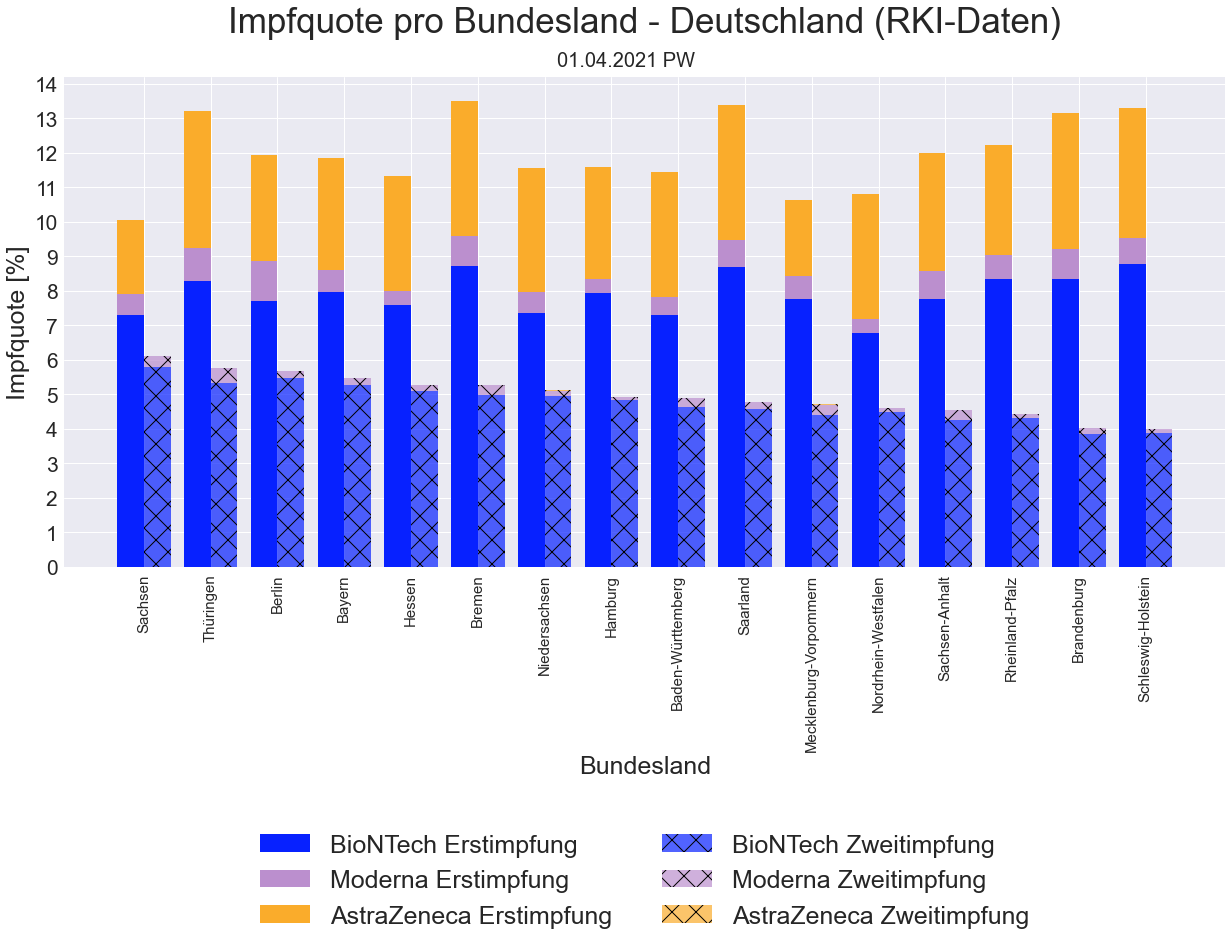

In [85]:
plt.figure(figsize=(h,v))

plt.style.use('seaborn')


w=0.40

x=df_I_EW["Bundesland"].tolist()
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]


p1 = plt.bar(x=bar1, height=df_I_EW["Impfquote_BioNTech_EI"], width = 0.4, 
             align = 'center', color = c_ger, label = "BioNTech Erstimpfung")

p2 = plt.bar(x=bar1, height=df_I_EW["Impfquote_Moderna_EI"], width = 0.4, 
             align = 'center', color = c_cz, 
             bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Moderna Erstimpfung")

p3 = plt.bar(x=bar1, height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.4, ###
             align = 'center', color = c_gb, 
             bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), 
             label = "AstraZeneca Erstimpfung")



p4 = plt.bar(x=bar2, height=df_I_EW["Impfquote_BioNTech_ZI"], width = 0.4, 
             align = 'center', color = c_ger, label = "BioNTech Zweitimpfung", hatch="x", alpha = 0.7)

p5 = plt.bar(x=bar2, height=df_I_EW["Impfquote_Moderna_ZI"], width = 0.4, 
             align = 'center', color = c_cz, hatch="x", alpha = 0.7,
             bottom=df_I_EW["Impfquote_BioNTech_ZI"], label = "Moderna Zweitimpfung")


p6 = plt.bar(x=bar2, height=df_I_EW["Impfquote_AstraZeneca_ZI"], width = 0.4, ###
             align = 'center', color = c_gb, hatch="x", alpha = 0.7,
             bottom=  np.array(df_I_EW["Impfquote_BioNTech_ZI"]) + np.array(df_I_EW["Impfquote_Moderna_ZI"]), 
             label = "AstraZeneca Zweitimpfung")

# p6 = plt.bar(x=bar2, height=df_I_EW["Impfquote_AstraZeneca_ZI"], width = 0.4, ###
#              align = 'center', color = c_gb, alpha =0.7
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_ZI"]) + np.array(df_I_EW["Impfquote_Moderna_ZI"]), 
#              label = "AstraZeneca Zweitimpfung")






# p2 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_Moderna_EI"], width = 0.9, 
#              align = 'center', color = c_cz, 
#              bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Impfquote Moderna Erstimpfung")

# p3 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.9, ###
#              align = 'center', color = c_gb, 
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), label = "Impfquote AstraZeneca Erstimpfung")

# p4 = plt.bar(x=bar2, height=df_I_EW["Impfquote_ZI"], width = 0.4, 
#              align = 'center', color = c_at, 
#              label = "Impfquote Zweitimpfung")

# # Schriftgrößen x und y achsenwerte
plt.xticks(bar1+w/2, x,fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.yticks(np.arange(0, df_I_EW["Impfquote_EI"].max() +1 , 1))


plt.ylabel('Impfquote [%]', fontsize=size)
plt.xlabel('Bundesland', fontsize=size)

plt.title('Impfquote pro Bundesland - Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.5),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_7, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_7, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

In [86]:
# # def y_axis_thousands(x, pos):
# #    # 'The two args are the value and tick position'
# #     return '{:0,d}'.format(int(x)).replace(",",".")
# # formatter = FuncFormatter(y_axis_thousands)


# # fig = plt.figure(figsize=(h,v))
# # ax = fig.add_subplot()
# # ax.yaxis.set_major_formatter(formatter)

# plt.figure(figsize=(h,v))

# plt.style.use('seaborn')

# p1 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_BioNTech_EI"], width = 0.9, 
#              align = 'center', color = c_ger, label = "Impfquote BioNTech Erstimpfung")

# p2 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_Moderna_EI"], width = 0.9, 
#              align = 'center', color = c_cz, 
#              bottom=df_I_EW["Impfquote_BioNTech_EI"], label = "Impfquote Moderna Erstimpfung")

# p3 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_AstraZeneca_EI"], width = 0.9, ###
#              align = 'center', color = c_gb, 
#              bottom=  np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]), label = "Impfquote AstraZeneca Erstimpfung")

# p4 = plt.bar(x=df_I_EW["Bundesland"], height=df_I_EW["Impfquote_ZI"], width = 0.9, 
#              align = 'center', color = c_at, 
#              bottom=np.array(df_I_EW["Impfquote_BioNTech_EI"]) + np.array(df_I_EW["Impfquote_Moderna_EI"]) + np.array(df_I_EW["Impfquote_AstraZeneca_EI"]), 
#              label = "Impfquote Zweitimpfung")

# # # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation=90)
# plt.yticks(fontsize=size -4)

# plt.yticks(np.arange(0, df_I_EW["Impfquote_EI_ZI"].max() +0.5 , 0.5))


# plt.ylabel('Anteil verabreichte Dosen [%]', fontsize=size)
# plt.xlabel('Bundesland', fontsize=size)

# plt.title('Anteil verabreichte Dosen - Deutschland (RKI-Daten)\n', fontsize=size)
# plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# plt.legend(loc='upper center', 
#            bbox_to_anchor=(0.5, -0.5),
#            fancybox=True, 
#            shadow=True, 
#            ncol=2, 
#            fontsize=size)

# # plt.text(x, y, f'Anteil verabreichte Dosen Deutschland : {Impfquote_ger}%\n (Verabreichte Dosen)', 
# #         horizontalalignment='center', 
# #         size=size-4, 
# #         style='italic',
# #         bbox={'facecolor': c_ger, 'alpha': 0.5, 'pad': 5})


# # korrigierte Hochrechnung mit exp model machen 
# # plt.text(x, y, f'grobe Hochrechnung: 60% der Bevölkerung geimpft in \nca. {Herdenimmun} Jahren.\nImpfquote Deutschland: {Impfquote_ger}%', 
# #         horizontalalignment='center', 
# #         size=size-4, 
# #         style='italic',
# #         bbox={'facecolor': c_ger, 'alpha': 0.5, 'pad': 5})

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(Laufwerk + pfad_output + name_7, dpi = dpi, bbox_inches='tight')
# plt.savefig(Laufwerk + pfad_onedrive + name_7, dpi = dpi, bbox_inches='tight')

# plt.show()
# #plt.show()

### df_I_EW (Impfquote)

In [87]:
# #df_I_EW.head(1)

In [88]:
# # Timeseries gestern einlesen
# df_I_timeseries1 = pd.read_csv('D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\output\\Dataframes\\df_I_timeseries.csv')

In [89]:
#df_I_EW.head(3)

### Berechnung Herdeinimmunität

In [90]:
df_I_EW

,Bundesland,Einwohner,BioNTech_EI,Impfquote_BioNTech_EI,Moderna_EI,Impfquote_Moderna_EI,AstraZeneca_EI,Impfquote_AstraZeneca_EI,BioNTech_ZI,Impfquote_BioNTech_ZI,Moderna_ZI,Impfquote_Moderna_ZI,AstraZeneca_ZI,Impfquote_AstraZeneca_ZI,Summe_EI,Impfquote_EI,Summe_ZI,Impfquote_ZI,Summe_EI_ZI,Impfquote_EI_ZI
12,Sachsen,4071971.0,296575,7.28333,24606,0.604277,88108,2.16377,236130,5.79891,12396,0.304423,0,0,409289,10.0514,248526,6.10333,657815,16.1547
15,Thüringen,2133378.0,176794,8.28705,20001,0.937527,84697,3.97009,113746,5.33173,8859,0.415257,12,0.000562488,281492,13.1947,122617,5.74755,404109,18.9422
2,Berlin,3669491.0,282340,7.69426,42712,1.16398,113163,3.08389,200381,5.46073,7621,0.207685,0,0,438215,11.9421,208002,5.66842,646217,17.6105
1,Bayern,13124737.0,1043525,7.95083,83266,0.63442,427597,3.25795,690296,5.2595,26072,0.198648,80,0.000609536,1554388,11.8432,716448,5.45876,2270836,17.302
6,Hessen,6288080.0,475997,7.56983,26629,0.423484,209964,3.33908,320345,5.09448,10655,0.169448,81,0.00128815,712590,11.3324,331081,5.26522,1043671,16.5976
4,Bremen,681202.0,59391,8.71856,5963,0.875364,26621,3.90795,33836,4.9671,2018,0.296241,3,0.000440398,91975,13.5019,35857,5.26378,127832,18.7657
8,Niedersachsen,7993608.0,588498,7.36211,47831,0.598366,287931,3.60202,395689,4.95007,12051,0.150758,433,0.00541683,924260,11.5625,408173,5.10624,1332433,16.6687
5,Hamburg,1847253.0,146298,7.91976,7887,0.426958,59654,3.22934,89102,4.82349,1612,0.0872647,43,0.00232778,213839,11.5761,90757,4.91308,304596,16.4891
0,Baden-Württemberg,11100394.0,809497,7.29251,57403,0.517126,404138,3.64075,513975,4.63024,29957,0.269873,123,0.00110807,1271038,11.4504,544055,4.90122,1815093,16.3516
11,Saarland,986887.0,85794,8.6934,7645,0.774658,38564,3.90764,45197,4.57975,1796,0.181986,10,0.00101329,132003,13.3757,47003,4.76275,179006,18.1384


In [91]:

# Impfstart = datetime.strptime('28.12.2020', '%d.%m.%Y')
# Tage_seit_Impfstart = (now-Impfstart).days
Summe_Impfungen = df_I_EW["Summe_EI_ZI"].sum()
# Impfgeschwindigkeit = (1/2)*Summe_Impfungen/Tage_seit_Impfstart
# Impfgeschwindigkeit_gestern = (1/2)*df_I_EW["Differenz zum Vortag"].sum()

# if Impfgeschwindigkeit_gestern > Impfgeschwindigkeit:
#     Impfgeschwindigkeit = (Impfgeschwindigkeit*0.2 + Impfgeschwindigkeit_gestern*0.8)
#     print(f'Impfgeschwindigkeit = {Impfgeschwindigkeit} IF-Statement')

# Herdenimmun = round((1/12)*(1/30)*(E_ger*0.6)*(1/(Impfgeschwindigkeit)),1)   # grobe Schätzung Zeit bis Herdenimmun



# print(f'Tage_seit_Impfstart = {Tage_seit_Impfstart}')   # wie lange schon geimpft wird
print(f'Summe_Impfungen = {Summe_Impfungen}')
# print(f'Impfgeschwindigkeit = {Impfgeschwindigkeit} Mittelwert')
# print(f'Impfgeschwindigkeit_gestern = {Impfgeschwindigkeit_gestern}')
# print(f'E_ger = {E_ger}')   # Einwohner Deutschland
# print(f'Herdenimmun = {Herdenimmun} Jahren')

Summe_Impfungen = 13772656


In [92]:
# v=s/t    v = 83020000*0.6 / t

Summe_Impfungen = df_I_EW["Summe_EI_ZI"].sum()
print(f'Summe_Impfungen  = {Summe_Impfungen} Impfungen\n')


Ende = datetime.strptime('01.10.2021', '%d.%m.%Y')
Tage_bis_Oktober = (Ende - now).days
print(f'Tage_bis_Oktober = {Tage_bis_Oktober} Tage\n')

Impfungen80 = 2*(E_ger*0.8) - Summe_Impfungen
SOLL_Impfungen80 = int(Impfungen80*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen80 = {SOLL_Impfungen80} Impfungen pro Tag')
print(f'Impfungen80 = {Impfungen80} Impfungen\n')

Impfungen60 = 2*(E_ger*0.6) - Summe_Impfungen
SOLL_Impfungen60 = int(Impfungen60*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen60 = {SOLL_Impfungen60} Impfungen pro Tag')
print(f'Impfungen60 = {Impfungen60} Impfungen\n')

Impfungen30 = 2*(E_ger*0.3) - Summe_Impfungen
SOLL_Impfungen30 = int(Impfungen30*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen30 = {SOLL_Impfungen30} Impfungen pro Tag')
print(f'Impfungen30 = {Impfungen30} Impfungen\n')

Impfungen15 = 2*(E_ger*0.15) - Summe_Impfungen
SOLL_Impfungen15 = int(Impfungen15*(1/Tage_bis_Oktober))
print(f'SOLL_Impfungen15 = {SOLL_Impfungen15} Impfungen pro Tag')
print(f'Impfungen15 = {Impfungen15} Impfungen\n')

# Impfungen5 = 2*(E_ger*0.05) - Summe_Impfungen
# SOLL_Impfungen5 = int(Impfungen5*(1/Tage_bis_Oktober))
# print(f'SOLL_Impfungen5 = {SOLL_Impfungen5} Impfungen pro Tag')
# print(f'Impfungen5 = {Impfungen5} Impfungen\n')


Summe_Impfungen  = 13772656 Impfungen

Tage_bis_Oktober = 182 Tage

SOLL_Impfungen80 = 654172 Impfungen pro Tag
Impfungen80 = 119059344.0 Impfungen

SOLL_Impfungen60 = 471710 Impfungen pro Tag
Impfungen60 = 85851344.0 Impfungen

SOLL_Impfungen30 = 198018 Impfungen pro Tag
Impfungen30 = 36039344.0 Impfungen

SOLL_Impfungen15 = 61172 Impfungen pro Tag
Impfungen15 = 11133344.0 Impfungen



## Herdenimmunität Exponentialmodell

In [93]:
#df_I_EW

In [94]:
# # P = I*(1+v)^t 
# # t = ln(P/I) * ( 1 / ln(1+v) )
# # wobei P die ZIEL geimpften, I die heute geimpften, v der Wachstumsfaktor und t die Zeit ist

# Ziel_Geimpfte = E_ger*0.6
# print(f'Ziel_Geimpfte {Ziel_Geimpfte}')

# Geimpfte_Heute = df_I_EW["Summe_EI_ZI"].sum()
# print(f'Geimpfte_Heute= {Geimpfte_Heute}')

# Wachstumsfaktor = (1/10) * df_I_TS["Summe_EI_ZI"].iloc[-1] / df_I_TS["Summe_EI_ZI"].iloc[-10]
# print(f'Wachstumsfaktor = {Wachstumsfaktor}')

# ##########################################################

# Anzahl_Impfzentren = 400
# Impfungen_pro_Tag_MAX = 400 * 1000

# Tage_seit_Impfstart
# print(f'Tage_seit_Impfstart = {Tage_seit_Impfstart}')

# # logistic = MAX / (1+e^(-v*(x-x0))

# Zeit_Herdenimmun = np.log(Ziel_Geimpfte/Geimpfte_Heute) / (np.log(1+Wachstumsfaktor))
# print(f'Zeit_Herdenimmun = {Zeit_Herdenimmun}')

## df_I_TS Impfungen Timeseries

In [95]:
# Impfungen sheet_name der Datenquelle auslesen
df_I_sheet = pd.read_excel(Laufwerk + pfad_input + name_input, None)
sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
sheet_name = [*sheet_name][3]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen
sheet_name

# Datenimport Impfungen
df_I_TS = pd.read_excel(Laufwerk + pfad_input + name_input,
                    sheet_name = sheet_name,
                    usecols="A:C")

df_I_TS = df_I_TS[:-5]   # drop last row
df_I_TS = df_I_TS.dropna(axis=0, how='any', thresh = 2)   # drop rows with more than 2 NaN values
df_I_TS['Zweitimpfung'] = df_I_TS['Zweitimpfung'].fillna(0)

df_I_TS['Summe_EI_ZI'] = df_I_TS['Erstimpfung'] + df_I_TS['Zweitimpfung']

# df_I_TS['MA'] = df_I_TS['Summe_EI_ZI'].ewm(alpha=0.5, adjust=False).mean()
df_I_TS['MA'] = df_I_TS['Summe_EI_ZI'].rolling(window=7,min_periods=1).mean()

df_I_TS['MSTD_Impfungen'] = df_I_TS['Summe_EI_ZI'].rolling(window=7,min_periods=1).std()

df_I_TS['OTG_Impfungen'] = df_I_TS['MA'] + df_I_TS['MSTD_Impfungen']
df_I_TS['UTG_Impfungen'] = df_I_TS['MA'] - df_I_TS['MSTD_Impfungen']

df_I_TS['SOLL_Impfungen80'] = SOLL_Impfungen80
df_I_TS['SOLL_Impfungen60'] = SOLL_Impfungen60
df_I_TS['SOLL_Impfungen30'] = SOLL_Impfungen30
df_I_TS['SOLL_Impfungen15'] = SOLL_Impfungen15
# df_I_TS['SOLL_Impfungen5'] = SOLL_Impfungen5

df_I_TS['cumsum_EI'] = df_I_TS['Erstimpfung'].cumsum()
df_I_TS['cumsum_ZI'] = df_I_TS['Zweitimpfung'].cumsum()

df_I_TS = df_I_TS.loc[df_I_TS.Erstimpfung >0, :] # nur Erstimpfungen > 0 anzeigen
#df_I_TS

In [96]:
df_I_TS

,Datum,Erstimpfung,Zweitimpfung,Summe_EI_ZI,MA,MSTD_Impfungen,OTG_Impfungen,UTG_Impfungen,SOLL_Impfungen80,SOLL_Impfungen60,SOLL_Impfungen30,SOLL_Impfungen15,cumsum_EI,cumsum_ZI
0,2020-12-27 00:00:00,23779.0,0.0,23779.0,2.377900e+04,NaN,NaN,NaN,654172,471710,198018,61172,23779.0,0.0
1,2020-12-28 00:00:00,18386.0,0.0,18386.0,2.108250e+04,3.813427e+03,2.489593e+04,1.726907e+04,654172,471710,198018,61172,42165.0,0.0
2,2020-12-29 00:00:00,47613.0,0.0,47613.0,2.992600e+04,1.555293e+04,4.547893e+04,1.437307e+04,654172,471710,198018,61172,89778.0,0.0
3,2020-12-30 00:00:00,60821.0,0.0,60821.0,3.764975e+04,1.999719e+04,5.764694e+04,1.765256e+04,654172,471710,198018,61172,150599.0,0.0
4,2020-12-31 00:00:00,48359.0,0.0,48359.0,3.979160e+04,1.796812e+04,5.775972e+04,2.182348e+04,654172,471710,198018,61172,198958.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2021-03-28 00:00:00,138183.0,51951.0,190134.0,2.826569e+05,4.941281e+04,3.320697e+05,2.332440e+05,654172,471710,198018,61172,9036481.0,3882387.0
92,2021-03-29 00:00:00,198915.0,86384.0,285299.0,2.862969e+05,4.837772e+04,3.346746e+05,2.379191e+05,654172,471710,198018,61172,9235396.0,3968771.0
93,2021-03-30 00:00:00,200768.0,90504.0,291272.0,2.866273e+05,4.840682e+04,3.350341e+05,2.382205e+05,654172,471710,198018,61172,9436164.0,4059275.0
94,2021-03-31 00:00:00,184098.0,90936.0,275034.0,2.813566e+05,4.718595e+04,3.285425e+05,2.341706e+05,654172,471710,198018,61172,9620262.0,4150211.0


In [97]:
# # Impfungen sheet_name der Datenquelle auslesen
# df_I_sheet = pd.read_excel("D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\input\\Impfquotenmonitoring.xlsx", None)
# sheet_name = df_I_sheet.keys()         # Tabellenblätter Namen auslesen
# sheet_name = [*sheet_name][2]          # Namen des zweiten Tabellenblattes anzeigen [*dict] dict keyword->list Index 1 anzeigen

# # Datenimport Impfungen
# df_I_TS = pd.read_excel("D:\\Github\\Covid-19-Auswertung-WHO-DIVI\\input\\Impfquotenmonitoring.xlsx",
#                     sheet_name = sheet_name,
#                     usecols="A:B")



#gleitender Mittelwert der cases und deaths, 7 Tage
# df_I_TS['MA'] = df_I_TS['Gesamtzahl Impfungen'].rolling(window=7,min_periods=1, center = False).mean()


# Date_reported in eine Datumsspalte umwandeln
#df_I_TS['Datum der Impfung'] = pd.to_datetime(df_I_TS.Date_reported, utc=True)
#df_I_TS = df_I_TS.dropna(axis=0, how='any')
#df_I_TS = df_I_TS[df_I_TS.Datum != 'Impfungen gesamt']

## RKI - Impfungen Timeseries

In [98]:
#df_I_TS.head(5)

## 7-2 Anzahl Impfungen - SOLL Impfungen - Timeseries

ConversionError: Failed to convert value(s) to axis units: array([datetime.datetime(2020, 12, 27, 0, 0),
       datetime.datetime(2020, 12, 28, 0, 0),
       datetime.datetime(2020, 12, 29, 0, 0),
       datetime.datetime(2020, 12, 30, 0, 0),
       datetime.datetime(2020, 12, 31, 0, 0),
       datetime.datetime(2021, 1, 1, 0, 0),
       datetime.datetime(2021, 1, 2, 0, 0),
       datetime.datetime(2021, 1, 3, 0, 0),
       datetime.datetime(2021, 1, 4, 0, 0),
       datetime.datetime(2021, 1, 5, 0, 0),
       datetime.datetime(2021, 1, 6, 0, 0),
       datetime.datetime(2021, 1, 7, 0, 0),
       datetime.datetime(2021, 1, 8, 0, 0),
       datetime.datetime(2021, 1, 9, 0, 0),
       datetime.datetime(2021, 1, 10, 0, 0),
       datetime.datetime(2021, 1, 11, 0, 0),
       datetime.datetime(2021, 1, 12, 0, 0),
       datetime.datetime(2021, 1, 13, 0, 0),
       datetime.datetime(2021, 1, 14, 0, 0),
       datetime.datetime(2021, 1, 15, 0, 0),
       datetime.datetime(2021, 1, 16, 0, 0),
       datetime.datetime(2021, 1, 17, 0, 0),
       datetime.datetime(2021, 1, 18, 0, 0),
       datetime.datetime(2021, 1, 19, 0, 0),
       datetime.datetime(2021, 1, 20, 0, 0),
       datetime.datetime(2021, 1, 21, 0, 0),
       datetime.datetime(2021, 1, 22, 0, 0),
       datetime.datetime(2021, 1, 23, 0, 0),
       datetime.datetime(2021, 1, 24, 0, 0),
       datetime.datetime(2021, 1, 25, 0, 0),
       datetime.datetime(2021, 1, 26, 0, 0),
       datetime.datetime(2021, 1, 27, 0, 0),
       datetime.datetime(2021, 1, 28, 0, 0),
       datetime.datetime(2021, 1, 29, 0, 0),
       datetime.datetime(2021, 1, 30, 0, 0),
       datetime.datetime(2021, 1, 31, 0, 0),
       datetime.datetime(2021, 2, 1, 0, 0),
       datetime.datetime(2021, 2, 2, 0, 0),
       datetime.datetime(2021, 2, 3, 0, 0),
       datetime.datetime(2021, 2, 4, 0, 0),
       datetime.datetime(2021, 2, 5, 0, 0),
       datetime.datetime(2021, 2, 6, 0, 0),
       datetime.datetime(2021, 2, 7, 0, 0),
       datetime.datetime(2021, 2, 8, 0, 0),
       datetime.datetime(2021, 2, 9, 0, 0),
       datetime.datetime(2021, 2, 10, 0, 0),
       datetime.datetime(2021, 2, 11, 0, 0),
       datetime.datetime(2021, 2, 12, 0, 0),
       datetime.datetime(2021, 2, 13, 0, 0),
       datetime.datetime(2021, 2, 14, 0, 0),
       datetime.datetime(2021, 2, 15, 0, 0),
       datetime.datetime(2021, 2, 16, 0, 0),
       datetime.datetime(2021, 2, 17, 0, 0),
       datetime.datetime(2021, 2, 18, 0, 0),
       datetime.datetime(2021, 2, 19, 0, 0),
       datetime.datetime(2021, 2, 20, 0, 0),
       datetime.datetime(2021, 2, 21, 0, 0),
       datetime.datetime(2021, 2, 22, 0, 0),
       datetime.datetime(2021, 2, 23, 0, 0),
       datetime.datetime(2021, 2, 24, 0, 0),
       datetime.datetime(2021, 2, 25, 0, 0),
       datetime.datetime(2021, 2, 26, 0, 0),
       datetime.datetime(2021, 2, 27, 0, 0),
       datetime.datetime(2021, 2, 28, 0, 0),
       datetime.datetime(2021, 3, 1, 0, 0),
       datetime.datetime(2021, 3, 2, 0, 0),
       datetime.datetime(2021, 3, 3, 0, 0),
       datetime.datetime(2021, 3, 4, 0, 0),
       datetime.datetime(2021, 3, 5, 0, 0),
       datetime.datetime(2021, 3, 6, 0, 0),
       datetime.datetime(2021, 3, 7, 0, 0),
       datetime.datetime(2021, 3, 8, 0, 0),
       datetime.datetime(2021, 3, 9, 0, 0),
       datetime.datetime(2021, 3, 10, 0, 0),
       datetime.datetime(2021, 3, 11, 0, 0),
       datetime.datetime(2021, 3, 12, 0, 0),
       datetime.datetime(2021, 3, 13, 0, 0),
       datetime.datetime(2021, 3, 14, 0, 0),
       datetime.datetime(2021, 3, 15, 0, 0),
       datetime.datetime(2021, 3, 16, 0, 0),
       datetime.datetime(2021, 3, 17, 0, 0),
       datetime.datetime(2021, 3, 18, 0, 0),
       datetime.datetime(2021, 3, 19, 0, 0),
       datetime.datetime(2021, 3, 20, 0, 0),
       datetime.datetime(2021, 3, 21, 0, 0),
       datetime.datetime(2021, 3, 22, 0, 0),
       datetime.datetime(2021, 3, 23, 0, 0),
       datetime.datetime(2021, 3, 24, 0, 0),
       datetime.datetime(2021, 3, 25, 0, 0),
       datetime.datetime(2021, 3, 26, 0, 0),
       datetime.datetime(2021, 3, 27, 0, 0),
       datetime.datetime(2021, 3, 28, 0, 0),
       datetime.datetime(2021, 3, 29, 0, 0),
       datetime.datetime(2021, 3, 30, 0, 0),
       datetime.datetime(2021, 3, 31, 0, 0), 'Gesamt (ohne Bund)'],
      dtype=object)

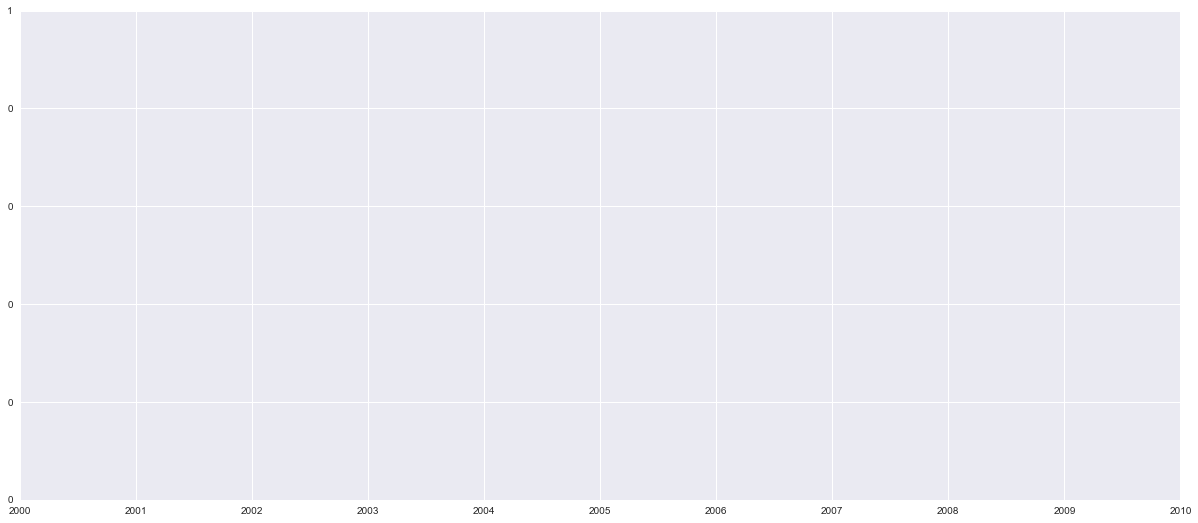

In [99]:

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)


# ax0 = plt.plot(df_I_TS['Datum'],df_I_TS['cumsum_EI'], color=c_ger, marker='.', markersize = 20, linestyle = 'solid', linewidth = lwb, 
#              label = "Impfungen\n(7-Tage Mittel)") # blau, linie, dick

ax1 = plt.plot(df_I_TS['Datum'],df_I_TS['MA'], color=c_ger, linestyle = 'solid', linewidth = lwb, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

ax2 = plt.plot(df_I_TS['Datum'],df_I_TS['Summe_EI_ZI'], marker='.', linestyle='', color=c_ger, markersize = 20)

# ax3 = plt.plot(df_I_TS['Datum'],df_I_TS['OTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, label ="+- 1 sigma")
# ax4 = plt.plot(df_I_TS['Datum'],df_I_TS['UTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, label ="")

ax5 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen80'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "SOLL-Impfungen pro Tag\num 15, 30, 60, 80% der Bevölkerung\nbis 01.10.2021 zu impfen (2 Dosen)")


ax6 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen60'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

ax7 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen30'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

ax8 = plt.plot(df_I_TS['Datum'],
               df_I_TS['SOLL_Impfungen15'], 
               color='#34eb46', 
               linestyle = 'dashed', 
               linewidth = lws, 
               label = "")

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Impfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_2, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_2, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## 7-3 Timeseries 

In [ ]:

def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)

fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)

ax1 = plt.plot(df_I_TS['Datum'],df_I_TS['MA'], color=c_ger, linestyle = 'solid', linewidth = lws, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

ax2 = plt.plot(df_I_TS['Datum'],df_I_TS['Summe_EI_ZI'], marker='.', linestyle='', color=c_ger, markersize = 20)

ax3 = plt.plot(df_I_TS['Datum'],df_I_TS['OTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, 
               label ="+- 1 sigma")

ax4 = plt.plot(df_I_TS['Datum'],df_I_TS['UTG_Impfungen'], color='red', linestyle = 'dashed', linewidth = lws, 
               label ="")

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Impfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


# # fill area between lines
plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color=c_ger,alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_3, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_3, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## Anzahl Impfungen kumuliert

In [ ]:
def y_axis_thousands(x, pos):
   # 'The two args are the value and tick position'
    return '{:0,d}'.format(int(x)).replace(",",".")
formatter = FuncFormatter(y_axis_thousands)


fig, ax = plt.subplots(figsize=(h, v))

ax.yaxis.set_major_formatter(formatter)


ax0 = plt.plot(df_I_TS['Datum'],df_I_TS['cumsum_EI'], color=c_ger, marker='.', markersize = 20, linestyle = 'solid', linewidth = lwb, 
               label = "Impfungen\n(7-Tage Mittelwert)") # blau, linie, dick

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 5, rotation=0)
plt.yticks(fontsize=size - 4)

plt.ylabel('Anzahl Impfungen', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Erstimpfungen Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

# # fill area between lines
# plt.fill_between(df_I_TS['Datum'], df_I_TS['OTG_Impfungen'], df_I_TS['UTG_Impfungen'] , color='red',alpha=0.5)

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.3),
           fancybox=True, 
           shadow=True, 
           ncol=2, 
           fontsize=size)

locator = mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.savefig(Laufwerk + pfad_output + name_7_4, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_7_4, dpi = dpi, bbox_inches='tight')

plt.show()
#plt.show()

## dataframes speichern

In [ ]:
df_EW.to_csv(Laufwerk + pfad_output + name_output_df_EW, index=False)
df_I.to_csv(Laufwerk + pfad_output + name_output_df_I, index=False)
df_I_EW.to_csv(Laufwerk + pfad_output + name_output_df_I_EW, index=False)
df_I_TS.to_csv(Laufwerk + pfad_output + name_output_df_I_TS, index=False)
# df_VOC.to_csv(Laufwerk + pfad_output + name_output_df_VOC, index=False)




## Performance messen

In [ ]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')